In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

In [2]:
# read in data retrieved from: www.kaggle.com/prondeau/superbowlads
df = pd.read_csv('superbowl-ads.csv', delimiter='^',quotechar='"')

df.iloc[561]='2020,' + df.iloc[561]


ads = df.iloc[:,0].str.split(',', n = 3, expand = True)
ads[3]=ads[3].str.replace('"','')
ads[1]=ads[1].str.replace('"','')
ads[2]=ads[2].str.strip('"')
ads2=ads[2].str.split('""', n = 1, expand = True) 
ads = pd.concat([ads.iloc[:,[0,1]],ads2,ads.iloc[:,3]],axis=1).values


# Build the final dataframe
final=pd.DataFrame(ads,columns=["Year","Type","Product","Title","Notes"])
final=final.loc[final['Type']!='Product type']
final

,Year,Type,Product,Title,Notes
0,1969,Car,Chrysler,"Scuba Diver""""[4]",A scuba diver in a dreamy sequence with groovy...
1,1970,Car,Pontiac,Humbler,A young man pulled up in his GTO to a drive-in...
2,1975,Security,Master Lock,Rifle,A man attempts to break a Master Lock with a r...
3,1976,Copy,Xerox,Monks,A monk must make 500 handwritten scriptures fo...
4,1979,Soft drink,Coca-Cola,Hey Kid,"Catch!,A young kid tries to talk to Mean Joe ..."
...,...,...,...,...,...
558,2020,Food,Doritos,"""The Cool Ranch"""""" ""Lil Nas X and Sam Elliott ...",None
559,2020,Food,Planters,"""Tribute"""""" ""Following his death in a previous ad",Mr. Peanut returns to life as a newborn child...
560,2020,Food,Pop-Tarts Pretzel,"""Pop-Tarts Fixed the Pretzel"""""" ""Jonathan Van ...",promoting it as an alternative to boring pret...
561,2020,Food,TV series,None,"Pringles, Rick and Morty,,After Morty enthusia..."


In [3]:
# fixing types

types = {'Adhesives':'Adhesives',
         'Airlines':'Travel', 
         'Alcohol':'Drink',
         'Alcohol / TV series':'Drink',
         'Antifungal medication':'Antifungal medication',
         'Beer':'Drink',
         'Beverage':'Drink',
         'Building materials':'Building materials',
         'Camera':'Tech', 
         'Candy':'Food', 
         'Car':'Car', 
         'Car / Film':'Car', 
         'Car accessories':'Car', 
         'Cleaner':'House', 
         'Clothing':'Clothing', 
         'Computer':'Tech', 
         'Copy':'Tech', 
         'Credit card':'Credit card', 
         'Drink':'Drink', 
         'Feminine care products':'Care', 
         'Film':'Film', 
         'Food':'Food', 
         'Food / Drink':'Food', 
         'Footwear':'Clothing', 
         'Game':'Video Games',
         'Gaming':'Video Games', 
         'Headphones':'Phone',
         'Insurance':'Insurance', 
         'Investments':'Investments', 
         'Laundry detergent':'House', 
         'Lingerie':'Clothing', 
         'Loans':'Loans',
         'Mail':'Mail',
         'Manufacturing':'Car', 
         'Mobile phone':'Phone', 
         'NFL':'Sports', 
         'PSA':'PSA',
         'Phone':'Phone', 
         'Phone accessory':'Phone', 
         'Potato chips':'Food', 
         'Restaurant':'Food', 
         'Retail':'Website',
         'Security':'Security', 
         'Service':'Service', 
         'Shoes':'Clothing', 
         'Skincare products':'Care', 
         'Smart speaker':'Tech', 
         'Soft Drink':'Drink', 
         'Soft drink':'Drink', 
         'Software':'Tax Preparation',
         'Sports':'Sports', 
         'Store':'Store',
         'TV':'TV', 
         'TV series':'TV', 
         'TV show':'TV', 
         'TV special':'TV', 
         'Tax preparation':'Tax Preparation',
         'Technology':'Tech', 
         'Tire':'Car', 
         'Toothpaste':'Care', 
         'Travel':'Travel', 
         'Truck':'Car', 
         'Video Game':'Video Games', 
         'Video game':'Video Games', 
         'Video games':'Video Games', 
         'Video gaming':'Video Games', 
         'Web hosting':'Web hosting',
         'Website':'Website',
         'Wireless':'Wireless'}

final['Category'] = final['Type'].map(types)
final.sample(n=10)

,Year,Type,Product,Title,Notes,Category
307,2014,Store,RadioShack,None,"The '80s Called,A RadioShack store is cleared ...",Store
136,2002,Film,Spider-Man,None,"TV promo, which gained popularity.",Film
534,2019,Smart speaker,Amazon Echo,"""Not Everything Makes the Cut",A series of rejected ideas for Alexa-powered p...,Tech
456,2018,Food,Avocados From Mexico,"""#GuacWorld",A utopian society sealed from the rest of the ...,Food
20,1993,Clothing,Lee,The Date,A young woman in her bedroom upstairs wearing ...,Clothing
141,2002,Website,Yahoo!,Dolphin,A man is walking in the waters near an island ...,Website
220,2009,Soft drink,Pepsi,I'm Good,"Many men drinking Pepsi Max get hurt, then say...",Drink
201,2008,Website,E*Trade,Baby,"The birth of the E*Trade baby, the baby explai...",Website
365,2016,Beer,Bud Light,"""Bud Light Party",Amy Schumer and Seth Rogen form a political pa...,Drink
132,2002,Beer,Budweiser,Clydesdale Respect,As a tribute to the victims of the September 1...,Drink


In [4]:
### most popular category of advertisement

final['Category'].value_counts()

Film                     140
Drink                     90
Car                       89
Food                      58
Website                   46
TV                        23
Wireless                  13
Tech                      12
Video Games               10
Clothing                  10
Sports                     9
Phone                      8
Credit card                7
House                      7
Tax Preparation            5
Mail                       5
Insurance                  4
Store                      4
Care                       3
Travel                     3
Service                    2
Web hosting                2
Security                   2
Loans                      1
Antifungal medication      1
Building materials         1
Investments                1
Adhesives                  1
PSA                        1
Name: Category, dtype: int64

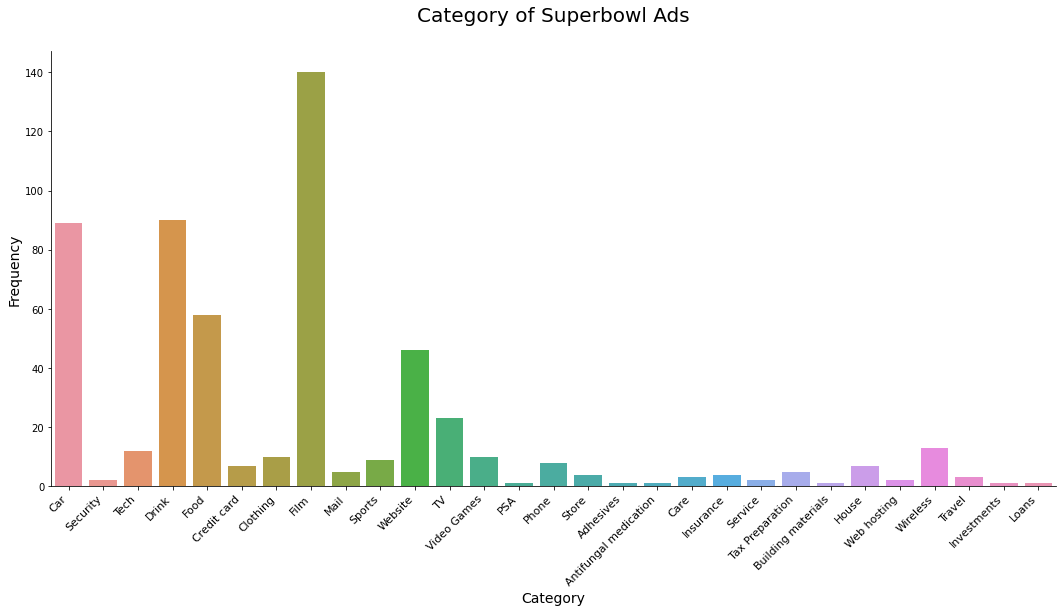

In [5]:
# set fig size
plt.figure(figsize = (18,8))

ax = sns.countplot(x="Category", data=final)

# set title
ax.set_title('Category of Superbowl Ads', fontsize=20, pad=30)

# set x label
ax.set_xlabel('Category', fontsize=14) 

# set y label
ax.set_ylabel('Frequency', fontsize=14)

# rotate tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=11)

# remove top and right border
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

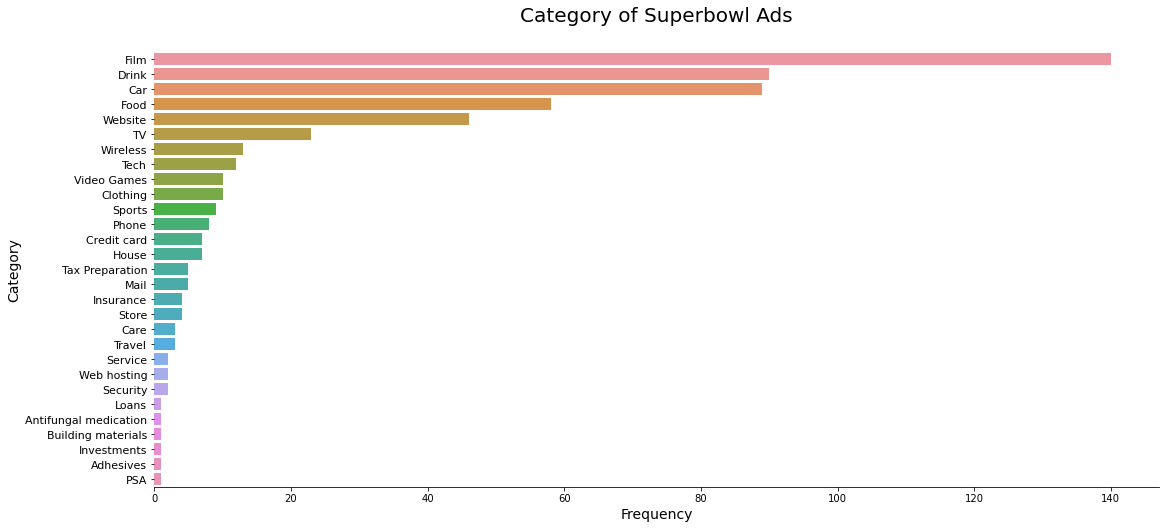

In [6]:
# set fig size
plt.figure(figsize = (18,8))

ax = sns.countplot(y="Category", data=final, order = final['Category'].value_counts().index)

# set title
ax.set_title('Category of Superbowl Ads', fontsize=20, pad=30)

# set x label
ax.set_xlabel('Frequency', fontsize=14) 

# set y label
ax.set_ylabel('Category', fontsize=14)

# y tick labels
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)

# remove top, left and right border
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.show()

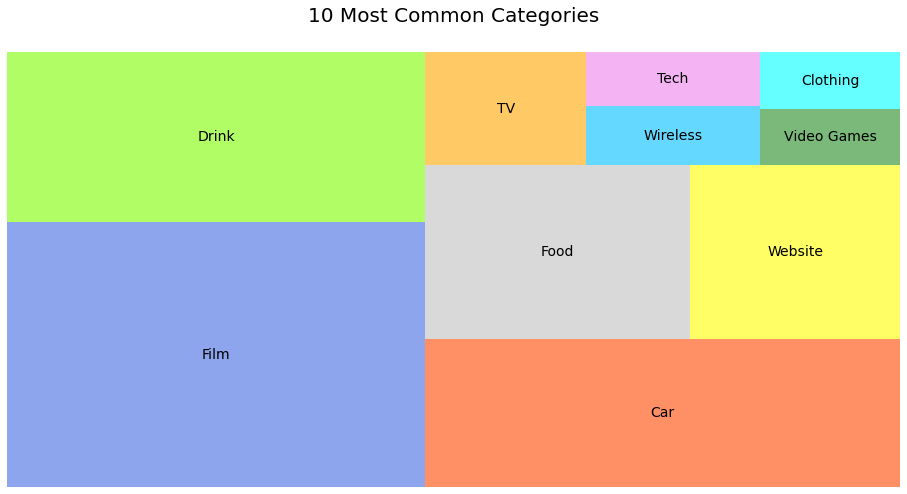

In [7]:
# take the 10 most common categories
final_10 = final['Category'].value_counts().rename_axis('Category').to_frame('Frequency').reset_index().head(10)

#tree map
plt.figure(figsize = (16,8))
sizes= final_10['Frequency']
label=final_10['Category']
color=['royalblue','lawngreen','orangered','silver','yellow',
       'orange','deepskyblue','violet','forestgreen','cyan']


squarify.plot(sizes=sizes, label=label, color=color, alpha=0.6, text_kwargs={'fontsize':14})

plt.title('10 Most Common Categories', fontsize=20, pad=30)

plt.axis('off')
plt.show()

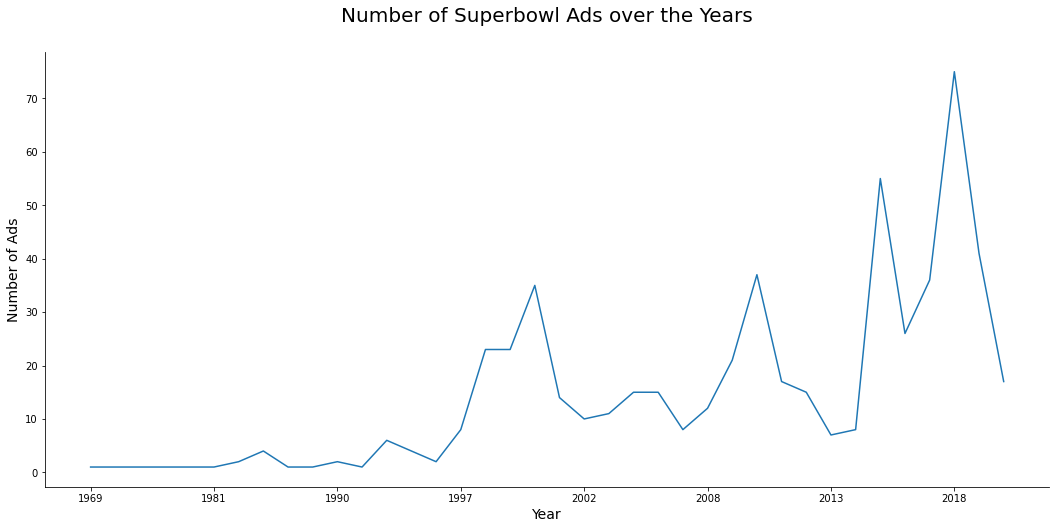

In [8]:
# number of superbowl ads by year 

plt.figure(figsize = (18,8))

ax = final.groupby('Year').size().plot()

# set title
ax.set_title('Number of Superbowl Ads over the Years', fontsize=20, pad=30)

# set y label title
ax.set_ylabel('Number of Ads', fontsize=14)

# set x label title
ax.set_xlabel('Year', fontsize=14)

# remove top and right border
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()